In [9]:
'''
!pip install scipy
!pip install matplotlib
!pip install numpy
'''

'\n!pip install scipy\n!pip install matplotlib\n!pip install numpy\n'

In [2]:
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import numpy as np

In [3]:
result = set()

In [4]:
'''Returns the distance between point x and 
   the line between points a and b'''
def line_distance(a, b, x):
    # absolute used to make negative values positive
    return abs((x[1] - a[1]) * (b[0] - a[0]) - 
              (b[1] - a[1]) * (x[0] - a[0]))

In [5]:
def search_side(a, b, x):
    res = (x[1] - a[1]) * (b[0] - a[0]) - (b[1] - a[1]) * (x[0] - a[0])
    if res > 0:
        return 1
    if res < 0:
        return -1
    return 0

In [6]:
def quickhull(points, length, a, b, side):
    
    index = -1
    max_distance = 0
    
    for i in range(length):
        temp = line_distance(a, b, points[i])
        
        if (search_side(a, b, points[i]) == side) and (temp > max_distance):
            index = i
            max_distance = temp
    
    if index == -1:
        result.add("/".join(map(str, a)))
        result.add("/".join(map(str, b)))
        return
    
    # Recursive part for the next points
    quickhull(points, length, points[index], a, -search_side(points[index], a, b))
    quickhull(points, length, points[index], b, -search_side(points[index], b, a))

In [7]:
def printhull(points, length):
    if (length < 3):
        print("Convex hull is not possible with too little points")
        return
    
    min_x = 0
    max_x = 0
    for i in range(1, length):
        if points[i][0] < points[min_x][0]:
            min_x = i
        if points[i][0] > points[max_x][0]:
            max_x = i
    
    # find points on one side of the line between min and max x value
    quickhull(points, length, points[min_x], points[max_x], 1)
    # find points on other side of the line between min and max x value
    quickhull(points, length, points[min_x], points[max_x], -1)
    
    print("Points in the Convex Hull:")
    
    for element in result:
        x = element.split("/")
        print("(", x[0], ",", x[1], ") ", end = " ")

In [41]:
points = [[0, 3], [1, 1], [2, 2], [4, 4],
            [0, 0], [1, 2], [3, 1], [3, 3]];
length = len(points)
printhull(points, length)

Points in the Convex Hull:
( 3 , 1 )  ( 0 , 0 )  ( 1 , 1 )  ( 0 , 3 )  ( 4 , 4 )  

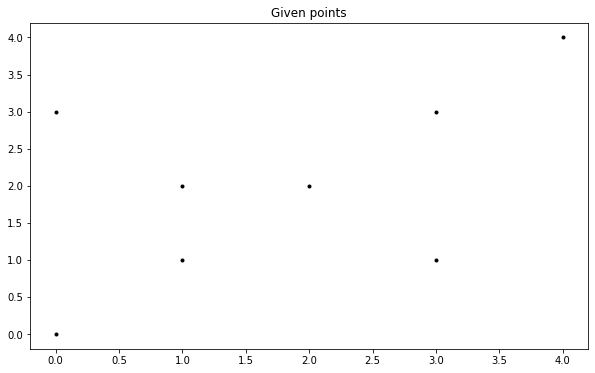

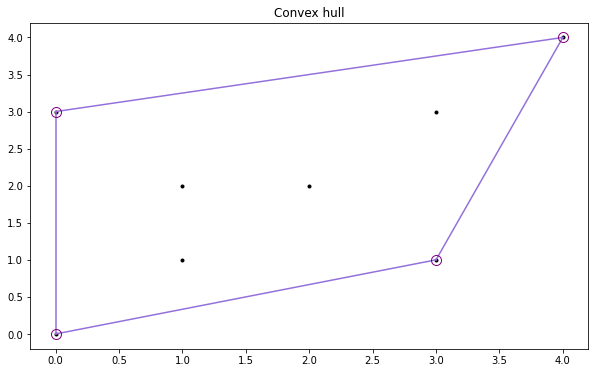

In [50]:
points = np.asarray(points)
hull = ConvexHull(points)
for plot_id in (1, 2):
    fig, ax = plt.subplots(ncols=1, figsize=(10, 6))
    ax.plot(points[:, 0], points[:, 1], '.', color='k')
    if plot_id == 1:
        ax.set_title('Given points')
    else:
        ax.set_title('Convex hull')
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'mediumpurple')
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='purple', color='none', lw=1, markersize=10)
    plt.show()